In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
import spacy
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

In [3]:
df= pd.read_csv('apple.csv')

In [4]:
df.head()

,index,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,body,sentiment,score
0,0,comment,hitr97r,2qjfk,stocks,False,1635724579,https://old.reddit.com/r/stocks/comments/qjvo1...,I own all 3. Don't sell AAPL.,0.0000,1
1,1,comment,hitq83x,2qjfk,stocks,False,1635724042,https://old.reddit.com/r/stocks/comments/qj07j...,I believe TSLA want to be like AAPL: part hard...,-0.2500,2
2,2,comment,hitp3wy,3qd6hq,millennialbets,False,1635723463,https://old.reddit.com/r/MillennialBets/commen...,**[Recent News for BABA-](https://www.reddit.c...,0.9422,1
3,3,comment,hitnu8x,2qsbv,dividends,False,1635722829,https://old.reddit.com/r/dividends/comments/qj...,"O, AAPL, NKE",NaN,1
4,4,comment,hitmll9,2qjfk,stocks,False,1635722214,https://old.reddit.com/r/stocks/comments/qjvo1...,I have both. CRM has had better revenue and ea...,0.7896,1


In [5]:
date = []
for i in df['created_utc']:
    day = datetime.fromtimestamp(i).strftime('%Y-%m-%d')
    date.append(day)

In [17]:
df['date'] = date

In [18]:
df2 = df[['body', 'date']]

In [19]:
df2.head()

,body,date
0,I own all 3. Don't sell AAPL.,2021-10-31
1,I believe TSLA want to be like AAPL: part hard...,2021-10-31
2,**[Recent News for BABA-](https://www.reddit.c...,2021-10-31
3,"O, AAPL, NKE",2021-10-31
4,I have both. CRM has had better revenue and ea...,2021-10-31


In [22]:
df2['date'] = df2['date'].astype('datetime64[ns]')

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297533 entries, 0 to 297532
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   body    297533 non-null  object        
 1   date    297533 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 4.5+ MB


In [24]:
df2.isnull().sum()

body    0
date    0
dtype: int64

In [25]:
appl = pd.read_csv('AAPL.csv')

In [26]:
appl.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,29-Oct-21,147.22,149.94,146.41,149.80,148.72,"124,953,200"
1,28-Oct-21,149.82,153.17,149.72,152.57,151.47,"100,077,900"
2,27-Oct-21,149.36,149.73,148.49,148.85,147.78,"56,094,900"
3,26-Oct-21,149.33,150.84,149.01,149.32,148.24,"60,893,400"
4,25-Oct-21,148.68,149.37,147.62,148.64,147.57,"50,720,600"


In [28]:
appl['Date'] = appl['Date'].astype('datetime64[ns]')

In [29]:
def get_sentiment(comment):
    
    tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|http\S+')
    tokenized_string = tokenizer.tokenize(comment) 
    
    lower_string_tokenized = [word.lower() for word in tokenized_string]
    
    nlp = spacy.load('en_core_web_sm')
    
    all_stopwords = nlp.Defaults.stop_words
    text = lower_string_tokenized
    tokens_without_sw = [word for word in text if not word in all_stopwords]
    
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = ([lemmatizer.lemmatize(w) for w in tokens_without_sw])
    clean_output = lemmatized_tokens
    
    sia = SIA()
    results = []

    for sentences in clean_output:
        pol_score = sia.polarity_scores(sentences)
        pol_score['words'] = sentences
        results.append(pol_score)
    
    pd.set_option('display.max_columns', None, 'max_colwidth', None)
    df = pd.DataFrame.from_records(results)
    
  
    df['label'] = 0

    df.loc[df['compound'] > .10, 'label'] = 1
    df.loc[df['compound'] < -.10, 'label'] = -1
    
    if 1 in df['label'].unique() and -1 in df['label'].unique():
        
        split = df['label'].value_counts()[1] - df['label'].value_counts()[-1]
        
    elif 1 in df['label'].unique() and -1 not in df['label'].unique():
        
        split = df['label'].value_counts()[1] - 0
    elif 1 not in df['label'].unique() and -1 in df['label'].unique():
        split = 0 - df['label'].value_counts()[-1]
    else:
        split = 0
    return split

In [ ]:
sentiment = []
for i in df2['body']:
    try:
        sent = get_sentiment(i)
        sentiment.append(sent)
    except:
        sentiment.append('Na')

In [66]:
sent = []
for i in sentiment:
    try:
        x = pd.to_numeric(i)
        sent.append(i)
    except:
        sent.append(0)

In [67]:
df2['Sentiment'] = sent

In [79]:
df2.head()

,body,date,Sentiment
0,I own all 3. Don't sell AAPL.,2021-10-31,0
1,I believe TSLA want to be like AAPL: part hard...,2021-10-31,-2
2,**[Recent News for BABA-](https://www.reddit.c...,2021-10-31,17
3,"O, AAPL, NKE",2021-10-31,0
4,I have both. CRM has had better revenue and ea...,2021-10-31,2


In [73]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297533 entries, 0 to 297532
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   body       297533 non-null  object        
 1   date       297533 non-null  datetime64[ns]
 2   Sentiment  297533 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 6.8+ MB


In [80]:
df_sent = df2.groupby('date')['Sentiment'].sum()

In [81]:
df_sent = pd.DataFrame(df_sent)

In [82]:
df_sent.head()

,Sentiment
date,
2016-10-31,16
2016-11-01,45
2016-11-02,57
2016-11-03,87
2016-11-04,22


In [118]:
df_com = pd.merge(df_sent, appl, left_on = 'date', right_on = 'Date', how = 'left')

In [119]:
df_com = df_com.dropna()

In [120]:
df_com.head()

,Sentiment,Date,Open,High,Low,Close*,Adj Close**,Volume
0,16,2016-10-31,28.41,28.56,28.30,28.39,26.43,"105,677,600"
1,45,2016-11-01,28.36,28.44,27.63,27.87,25.95,"175,303,200"
2,57,2016-11-02,27.85,28.09,27.81,27.90,25.97,"113,326,800"
3,87,2016-11-03,27.75,27.86,27.39,27.46,25.70,"107,730,400"
4,22,2016-11-04,27.13,27.56,27.03,27.21,25.46,"123,348,000"


In [121]:
tom_open = []
for i in range(len(df_com)):
    try:
        x = df_com['Open'].iloc[i+1] - df_com['Close*'].iloc[i]
    except:
        x = 'NA'
    tom_open.append(x)

In [122]:
df_com['Open_Diff'] = tom_open

In [123]:
tom_close = []
for i in range(len(df_com)):
    try:
        x = df_com['Close*'].iloc[i+1] - df_com['Close*'].iloc[i]
    except:
        x = 'NA'
    tom_close.append(x)

In [124]:
df_com['Close_Diff'] = tom_close

In [125]:
df_com.tail()

,Sentiment,Date,Open,High,Low,Close*,Adj Close**,Volume,Open_Diff,Close_Diff
1820,1029,2021-10-25,148.68,149.37,147.62,148.64,147.57,"50,720,600",0.69,0.68
1821,825,2021-10-26,149.33,150.84,149.01,149.32,148.24,"60,893,400",0.04,-0.47
1822,1356,2021-10-27,149.36,149.73,148.49,148.85,147.78,"56,094,900",0.97,3.72
1823,1810,2021-10-28,149.82,153.17,149.72,152.57,151.47,"100,077,900",-5.35,-2.77
1824,811,2021-10-29,147.22,149.94,146.41,149.80,148.72,"124,953,200",NA,NA


In [126]:
df_com = df_com.drop(1824, axis=0)

In [127]:
close = []
for i in df_com['Close_Diff']:
    if i > 0:
        close.append(1)
    else:
        close.append(0)

In [128]:
df_com['Class'] = close

In [129]:
df_com.head()

,Sentiment,Date,Open,High,Low,Close*,Adj Close**,Volume,Open_Diff,Close_Diff,Class
0,16,2016-10-31,28.41,28.56,28.30,28.39,26.43,"105,677,600",-0.03,-0.52,0
1,45,2016-11-01,28.36,28.44,27.63,27.87,25.95,"175,303,200",-0.02,0.03,1
2,57,2016-11-02,27.85,28.09,27.81,27.90,25.97,"113,326,800",-0.15,-0.44,0
3,87,2016-11-03,27.75,27.86,27.39,27.46,25.70,"107,730,400",-0.33,-0.25,0
4,22,2016-11-04,27.13,27.56,27.03,27.21,25.46,"123,348,000",0.31,0.39,1


In [143]:
volume = []
for i in df_com['Volume']:
    x = int(i.replace(',', ''))
    volume.append(x)

In [145]:
df_com['Volume'] = volume

<AxesSubplot:xlabel='Sentiment', ylabel='Open_Diff'>

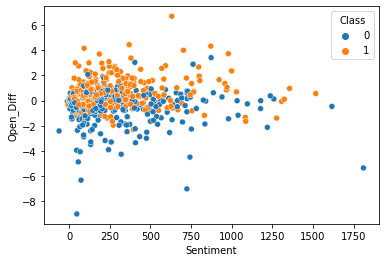

In [136]:
sns.scatterplot(data=df_com,x='Sentiment', y='Open_Diff', hue = 'Class')

<AxesSubplot:xlabel='Sentiment', ylabel='Count'>

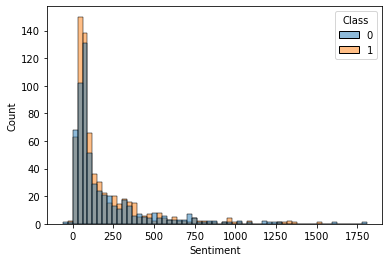

In [153]:
sns.histplot(data=df_com,x='Sentiment', hue = 'Class')

In [161]:
df2 = df_com.drop(['Open','High','Low','Close*','Adj Close**','Close_Diff', 'Date'], axis=1)

In [162]:
df2.head()

,Sentiment,Volume,Open_Diff,Class
0,16,105677600,-0.03,0
1,45,175303200,-0.02,1
2,57,113326800,-0.15,0
3,87,107730400,-0.33,0
4,22,123348000,0.31,1


In [179]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix, classification_report, accuracy_score

In [219]:
X = df2['Sentiment']
y = df2['Class']

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [221]:
scaler = MinMaxScaler()

In [224]:
X_train = X_train.values.reshape(-1,1)
scaled_X_train = scaler.fit_transform(X_train)
X_test = X_test.values.reshape(-1,1)
scaled_X_test = scaler.transform(X_test)

In [228]:
test_error_rates = []


for k in range(1,10):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train) 
   
    y_pred_test = knn_model.predict(scaled_X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

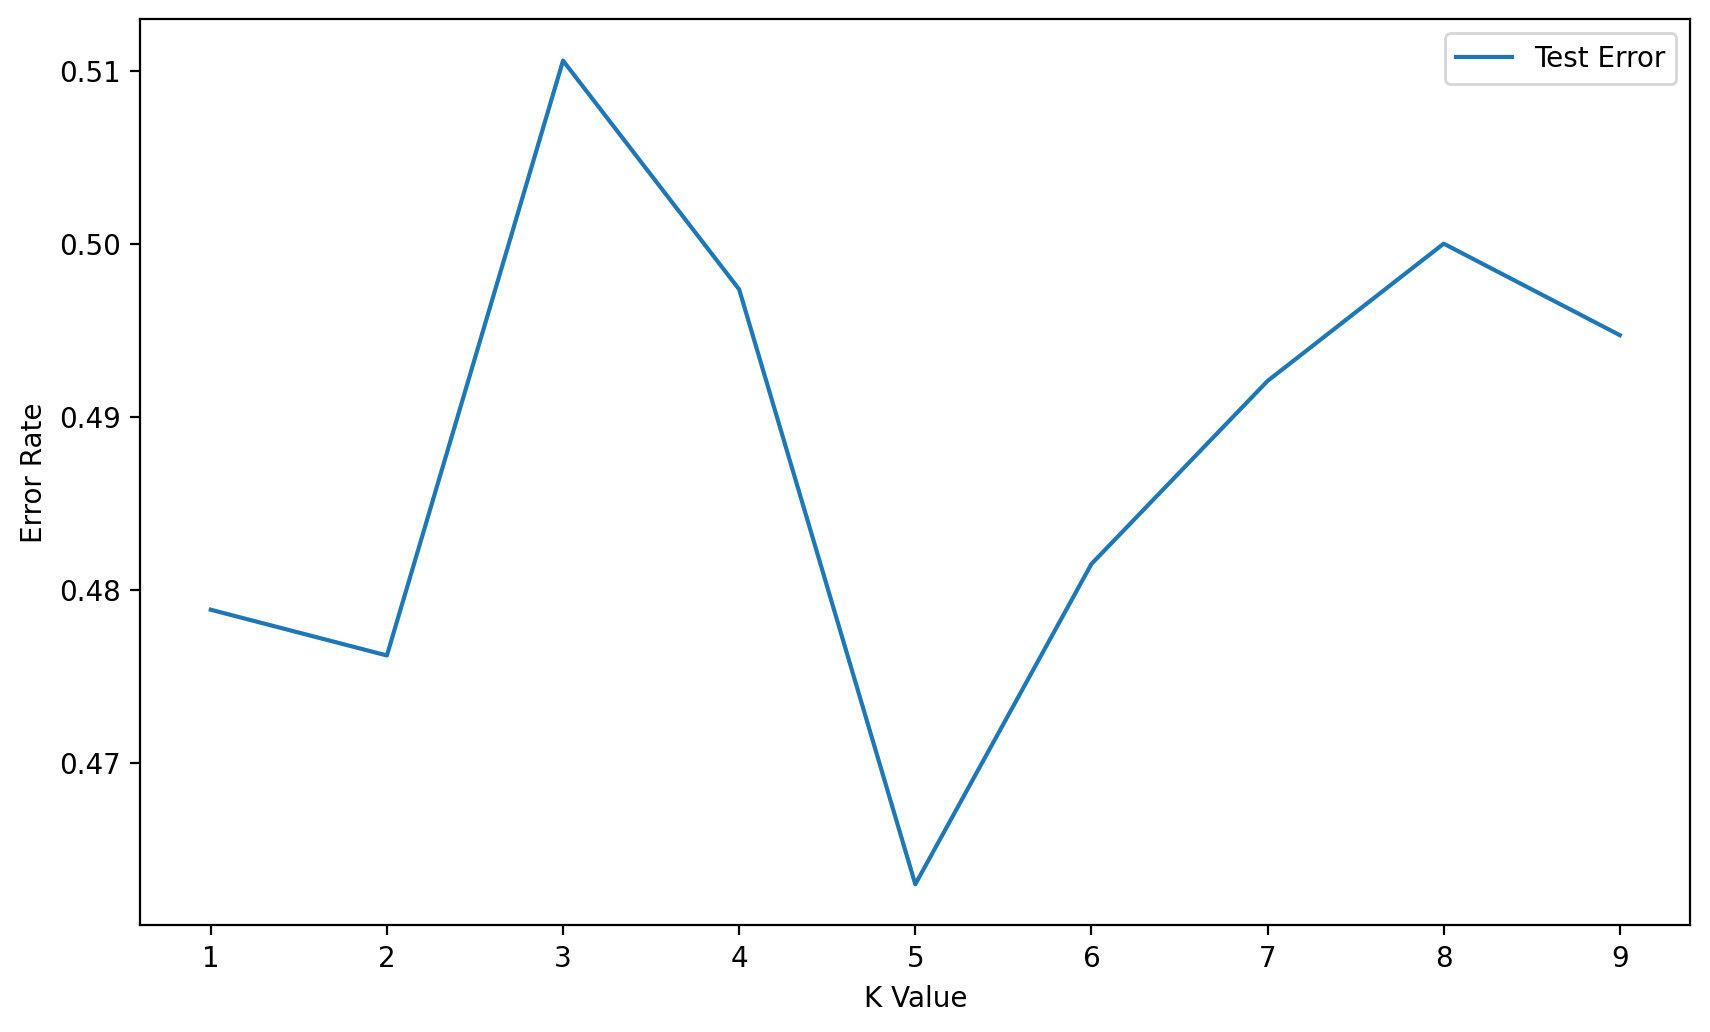

In [229]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,10),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

In [231]:
knn_model = KNeighborsClassifier(n_neighbors = 5)

In [232]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier()

In [233]:
preds = knn_model.predict(scaled_X_test)

In [234]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       0.43      0.52      0.47       151
           1       0.63      0.55      0.59       227

    accuracy                           0.54       378
   macro avg       0.53      0.53      0.53       378
weighted avg       0.55      0.54      0.54       378



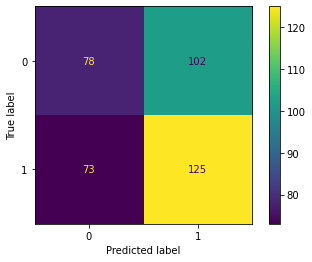

In [235]:
plot_confusion_matrix(knn_model, scaled_X_test,y_test)

In [241]:
X = df2.drop('Class', axis=1)
y=df2['Class']

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [243]:
scaler = MinMaxScaler()

In [244]:
scaled_X_train = scaler.fit_transform(X_train)

In [245]:
scaled_X_test = scaler.transform(X_test)

In [246]:
test_error_rates = []


for k in range(1,100):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train) 
   
    y_pred_test = knn_model.predict(scaled_X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

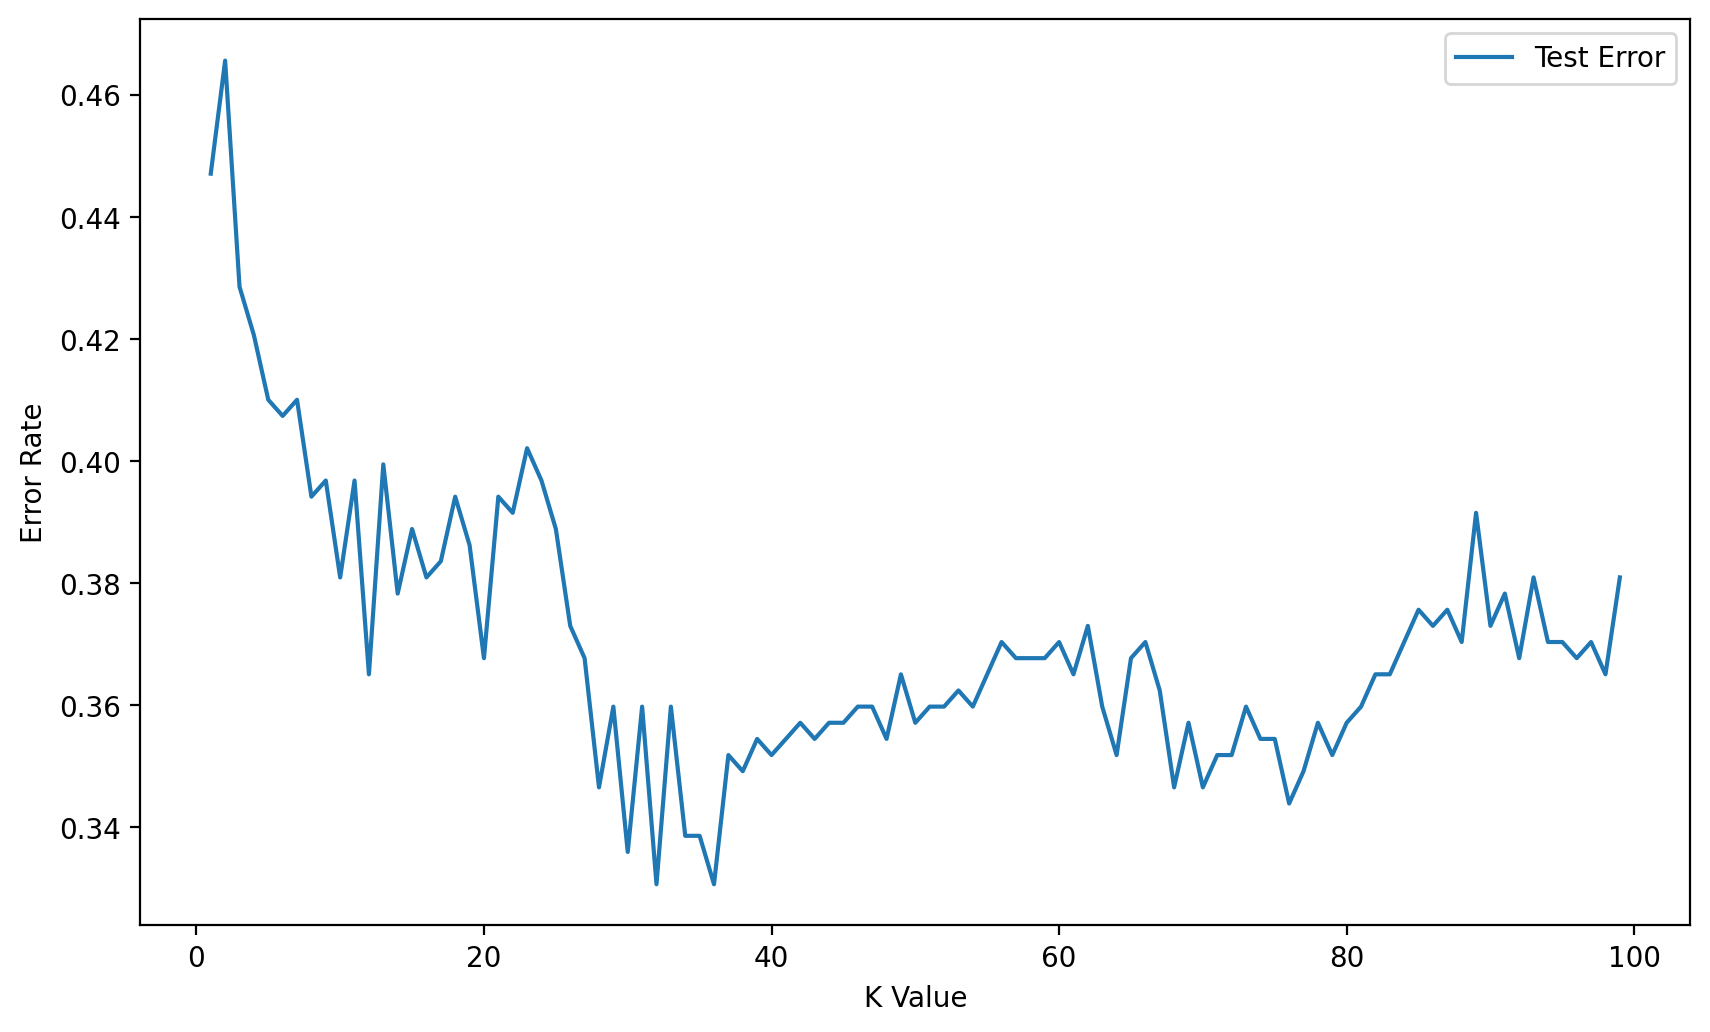

In [247]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,100),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

In [248]:
knn_model = KNeighborsClassifier(n_neighbors = 30)

In [249]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=30)

In [250]:
preds = knn_model.predict(scaled_X_test)

In [251]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       0.54      0.69      0.61       143
           1       0.77      0.65      0.71       235

    accuracy                           0.66       378
   macro avg       0.66      0.67      0.66       378
weighted avg       0.69      0.66      0.67       378



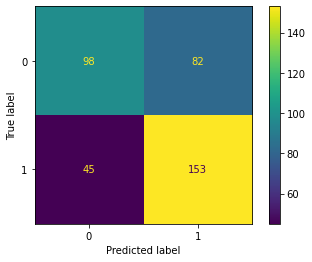

In [252]:
plot_confusion_matrix(knn_model, scaled_X_test,y_test)

In [253]:
rand_model = RandomForestClassifier()

In [254]:
param_grid = {"n_estimators":[1,5,10,20,40,100],'max_depth':[2,4,6,8,10,12]}

In [255]:
grid = GridSearchCV(rand_model,param_grid)

In [256]:
grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'n_estimators': [1, 5, 10, 20, 40, 100]})

In [258]:
grid.best_params_

{'max_depth': 6, 'n_estimators': 10}

In [259]:
preds = grid.predict(scaled_X_test)

In [260]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       0.53      0.64      0.58       151
           1       0.72      0.63      0.67       227

    accuracy                           0.63       378
   macro avg       0.63      0.63      0.63       378
weighted avg       0.65      0.63      0.64       378



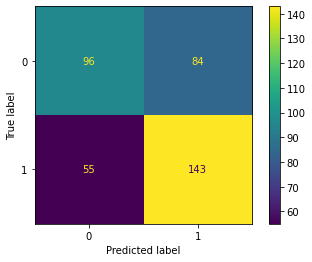

In [261]:
plot_confusion_matrix(grid, scaled_X_test,y_test)